In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



from sklearn.metrics import mean_squared_error, r2_score


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/train.csv')

# Display first few rows
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As we can see there are null values we need to perform data pre-processing on null values.

In [6]:
# Display missing values
print(df.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [8]:
# Impute missing values for numeric data with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values for categorical data with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


In [9]:
# Display missing values
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [10]:
print(df)

          Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1.0        60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1        2.0        20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2        3.0        60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3        4.0        70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4        5.0        60.0       RL         84.0  14260.0   Pave  Grvl      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456.0        60.0       RL         62.0   7917.0   Pave  Grvl      Reg   
1456  1457.0        20.0       RL         85.0  13175.0   Pave  Grvl      Reg   
1457  1458.0        70.0       RL         66.0   9042.0   Pave  Grvl      Reg   
1458  1459.0        20.0       RL         68.0   9717.0   Pave  Grvl      Reg   
1459  1460.0        20.0       RL         75.0   9937.0   Pave  Grvl      Reg   

     LandContour Utilities 

To drop irrelevant features

In [11]:
df.drop(columns=['Id'], inplace=True)

Finding Correlation matrix to drop multi-collinear features

Linear Regression - MSE: 1244778891.6456854, R2 Score: 0.8377149995942386
Ridge Regression - MSE: 1245015549.6130304, R2 Score: 0.8376841458911557
Lasso Regression - MSE: 1245662213.196425, R2 Score: 0.8375998387096973


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Decision Tree - MSE: 1959336265.0616438, R2 Score: 0.744556331486171
Random Forest - MSE: 785098730.536853, R2 Score: 0.8976446751637221
Gradient Boosting - MSE: 817198254.7415414, R2 Score: 0.8934597782848109
Support Vector Regressor - MSE: 7856641369.191167, R2 Score: -0.024290383090808332
                                   MSE  R2 Score
Random Forest             7.850987e+08  0.897645
Gradient Boosting         8.171983e+08  0.893460
Linear Regression         1.244779e+09  0.837715
Ridge Regression          1.245016e+09  0.837684
Lasso Regression          1.245662e+09  0.837600
Decision Tree             1.959336e+09  0.744556
Support Vector Regressor  7.856641e+09 -0.024290


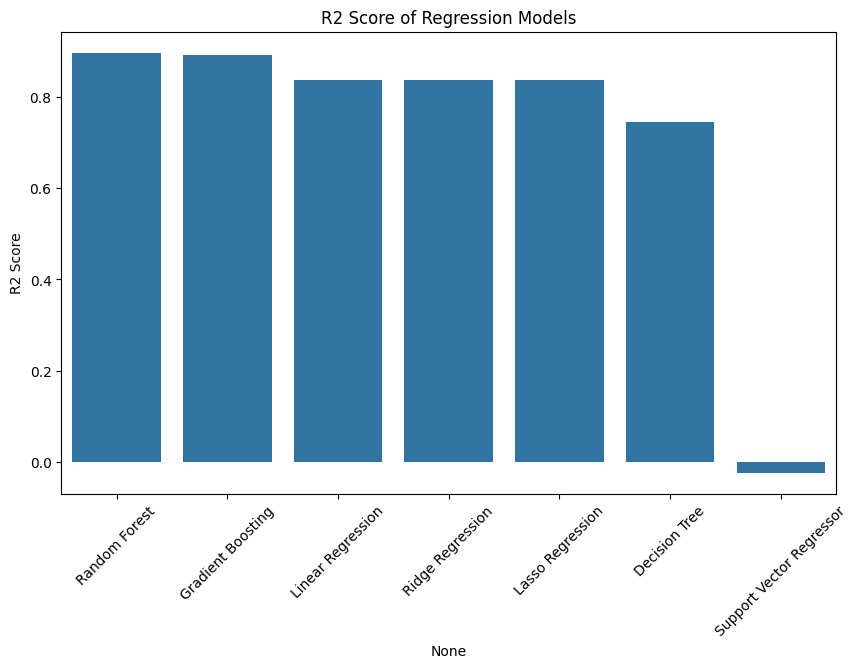

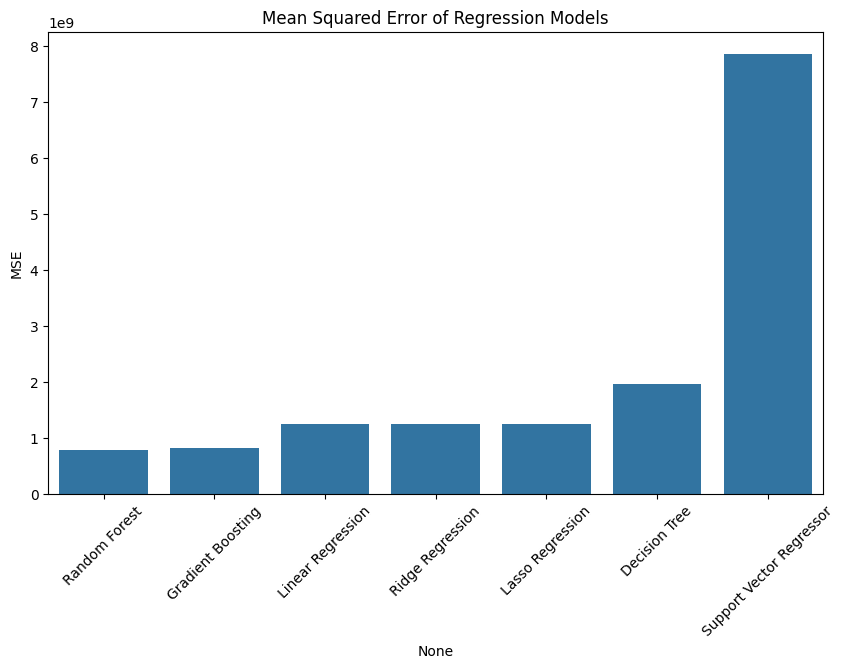

In [12]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")

# Visualize the results
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
print(results_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2 Score'])
plt.xticks(rotation=45)
plt.title('R2 Score of Regression Models')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['MSE'])
plt.xticks(rotation=45)
plt.title('Mean Squared Error of Regression Models')
plt.show()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

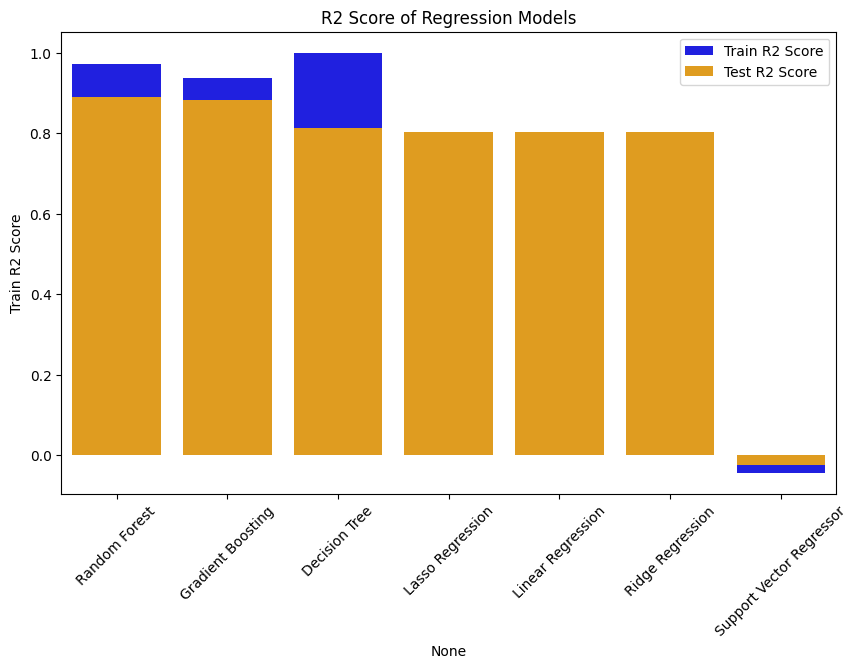

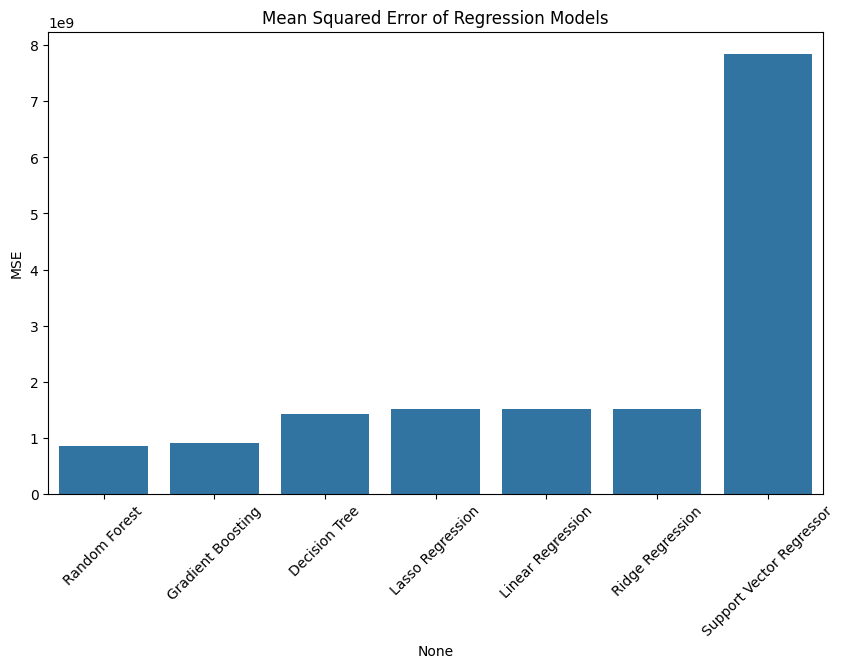

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/train.csv')

# Display first few rows
print(df.head())
df.info()

# Display missing values
print(df.isnull().sum())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numeric data with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values for categorical data with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Perform feature selection using RandomForestRegressor
selector = SelectFromModel(RandomForestRegressor(n_estimators=100))
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

# Transform the dataset to keep only selected features
X_selected = selector.transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)

    # Predict on testing data
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)

    results[name] = {'Train R2 Score': train_r2, 'Test R2 Score': test_r2, 'MSE': mse}
    print(f"{name} - Train R2 Score: {train_r2}, Test R2 Score: {test_r2}, MSE: {mse}")

# Visualize the results
results_df = pd.DataFrame(results).T
results_df.sort_values(by='Test R2 Score', ascending=False, inplace=True)
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Train R2 Score'], color='blue', label='Train R2 Score')
sns.barplot(x=results_df.index, y=results_df['Test R2 Score'], color='orange', label='Test R2 Score')
plt.xticks(rotation=45)
plt.title('R2 Score of Regression Models')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['MSE'])
plt.xticks(rotation=45)
plt.title('Mean Squared Error of Regression Models')
plt.show()
